In [736]:
import pandas as pd

In [737]:
# Nacitanie datasetu s pouzitim Pandas
df = pd.read_csv("zadanie2_dataset.csv")

In [738]:
df.describe()

,ID,Price,Prod. year,Engine volume,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,2.307990,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,0.877805,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,0.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,1.800000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,2.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,2.500000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,20.000000,16.000000,16.000000


In [739]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Turbo engine,Left wheel
0,45654403,13328.0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,4-5,Silver,12,False,True
1,44731507,16621.0,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000 km,6,Tiptronic,4x4,4-5,Black,8,False,True
2,45774419,8467.0,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,4-5,Black,2,False,False
3,45769185,3607.0,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,4-5,White,0,False,True
4,45809263,11726.0,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,4-5,Silver,4,False,True


In [740]:
df = df.drop(columns=['ID'])
df = df.drop(columns=['Model']) # do dokumentacie dat dovod dropu

In [741]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Color',
       'Airbags', 'Turbo engine', 'Left wheel'],
      dtype='object')

In [742]:
print(f'Počet riadkov v DataFrame: {len(df)}')

Počet riadkov v DataFrame: 19237


In [743]:
# prerobit iba levi, co je vela null hodnot, alebo nahradit tie pomlicky nulou alebo priemerom (inak -0.5b)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Nahradenie chýbajúcich hodnôt v stĺpci Levy mediánom
median_levy = df['Levy'][df['Levy'] != '-'].astype(float).median()
df['Levy'] = df['Levy'].replace('-', median_levy).astype(float)

df['Engine volume'] = pd.to_numeric(df['Engine volume'], errors='coerce')
df['Mileage'] = pd.to_numeric(df['Mileage'].str.replace(' km', '').str.replace(',', ''), errors='coerce')

In [744]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags,Turbo engine,Left wheel
0,13328.0,1399.0,LEXUS,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,4-5,Silver,12,False,True
1,16621.0,1018.0,CHEVROLET,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,4-5,Black,8,False,True
2,8467.0,781.0,HONDA,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,4-5,Black,2,False,False
3,3607.0,862.0,FORD,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,4-5,White,0,False,True
4,11726.0,446.0,HONDA,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,4-5,Silver,4,False,True


In [745]:
print(f'Pocet null hodnot v datasete je: {df.isnull().sum().sum()}')

df = df.dropna()

print(f'Pocet null hodnot po odstraneni v datasete je: {df.isnull().sum().sum()}')
print(f'Počet riadkov v DataFrame: {len(df)}')

Pocet null hodnot v datasete je: 0
Pocet null hodnot po odstraneni v datasete je: 0
Počet riadkov v DataFrame: 19237


In [746]:
print(f'Pocet duplikatov v datasete je: {df.duplicated().sum()}')

df = df.drop_duplicates()

print(f'Pocet duplikatov po odstraneni v datasete je: {df.duplicated().sum()}')
print(f'Počet riadkov v DataFrame: {len(df)}')

Pocet duplikatov v datasete je: 3530
Pocet duplikatov po odstraneni v datasete je: 0
Počet riadkov v DataFrame: 15707


In [747]:
# Target Encodingu pre stĺpec 'Manufacturer'
means = df.groupby('Manufacturer')['Price'].mean()
df['Manufacturer'] = df['Manufacturer'].map(means) # do doku treba napisat do z toho vzniklo, a co to je

# print(df.dtypes)

# Odstránenie outlierov
for col in df.columns:
    if df[col].dtype not in ['object', 'bool']:
        df = df[(df[col] >= df[col].quantile(0.05)) & (df[col] <= df[col].quantile(0.95))] # 10%-90% ked tak

In [748]:
print(f'Počet riadkov v DataFrame: {len(df)}')

Počet riadkov v DataFrame: 9190


In [749]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# One hot encodeing
df = pd.get_dummies(df, columns=['Category'], prefix='Category', drop_first=True)



# One Hot pre stlpec 'Gear box type'
df = pd.get_dummies(df, columns=['Gear box type'], prefix='GearBox', drop_first=True)

# One Hot pre stlpec 'Drive wheels'
df = pd.get_dummies(df, columns=['Drive wheels'], prefix='DriveWheels', drop_first=True)

# One Hot pre stlpec 'Doors'
df = pd.get_dummies(df, columns=['Doors'], prefix='Doors', drop_first=True)

# one hot stlpec color
df = pd.get_dummies(df, columns=['Color'], prefix='Color', drop_first=True)


# Zakódovanie stĺpca "Fuel type"
df = pd.get_dummies(df, columns=['Fuel type'], prefix='FuelType', drop_first=True)

# Zakódovanie stĺpca "Leather interior"
df['Leather interior'] = df['Leather interior'].map({'Yes': 1, 'No': 0})

# Zakódovanie stĺpca "Turbo engine"
df['Turbo engine'] = df['Turbo engine'].map({True: 1, False: 0})

# Zakódovanie stĺpca "Left wheel"
df['Left wheel'] = df['Left wheel'].map({True: 1, False: 0})

# pretypovanie novych stlpcov
columns = [col for col in df.columns if col.startswith('Color_') or col.startswith('Model_') or col.startswith('GearBox_') or col.startswith('DriveWheels_') or col.startswith('Doors_') or col.startswith('FuelType_') or col.startswith('Category_')]
df[columns] = df[columns].astype(int)


df.head()

,Price,Levy,Manufacturer,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Turbo engine,...,Color_Silver,Color_Sky blue,Color_White,Color_Yellow,FuelType_Diesel,FuelType_Hybrid,FuelType_Hydrogen,FuelType_LPG,FuelType_Petrol,FuelType_Plug-in Hybrid
1,16621.0,1018.0,15770.743802,2011,0,3.0,192000,6,8,0,...,0,0,0,0,0,0,0,0,1,0
3,3607.0,862.0,17243.641213,2011,1,2.5,168966,4,0,0,...,0,0,1,0,0,1,0,0,0,0
5,39493.0,891.0,23273.624672,2016,1,2.0,160931,4,4,0,...,0,0,1,0,1,0,0,0,0,0
6,1803.0,761.0,16585.839454,2010,1,1.8,258909,4,12,0,...,0,0,1,0,0,1,0,0,0,0
7,549.0,751.0,23273.624672,2013,1,2.4,216118,4,12,0,...,0,0,0,0,0,0,0,0,1,0


In [750]:
print(f'Počet riadkov v DataFrame: {len(df)}')

Počet riadkov v DataFrame: 9190


In [751]:
df.dtypes

Price                      float64
Levy                       float64
Manufacturer               float64
Prod. year                   int64
Leather interior             int64
Engine volume              float64
Mileage                      int64
Cylinders                    int64
Airbags                      int64
Turbo engine                 int64
Left wheel                   int64
Category_Coupe               int32
Category_Goods wagon         int32
Category_Hatchback           int32
Category_Jeep                int32
Category_Microbus            int32
Category_Minivan             int32
Category_Pickup              int32
Category_Sedan               int32
Category_Universal           int32
GearBox_Manual               int32
GearBox_Tiptronic            int32
GearBox_Variator             int32
DriveWheels_Front            int32
DriveWheels_Rear             int32
Doors_4-5                    int32
Doors_>5                     int32
Color_Black                  int32
Color_Blue          

In [752]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Rozdelenie dát na trénovaciu a testovaciu množinu
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Vytvorenie vstupných a výstupných množín
X_train = train_data.drop(columns=['Price'])  # Vstupné množiny (všetky stĺpce okrem 'Price')
y_train = train_data['Price']  # Výstupná množina (stĺpec 'Price')

X_test = test_data.drop(columns=['Price'])
y_test = test_data['Price']

# Normalizácia
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print(f"Počet príznakov pre rozhodovací strom: {X_train_normalized.shape[1]}")
print(f"Počet príznakov pre náhodný les: {X_train_normalized.shape[1]}")
print(f"Počet príznakov pre SVM: {X_train_normalized.shape[1]}")


Počet príznakov pre rozhodovací strom: 47
Počet príznakov pre náhodný les: 47
Počet príznakov pre SVM: 47


TEST: R2 Score - Decision Tree: 0.41048373579538
TEST: R2 Score - Random Forest: 0.5501768743733676
TEST: R2 Score - SVM: 0.35888246278501434
TRAIN: R2 Score - Decision Tree: 0.4205138654402134
TRAIN: R2 Score - Random Forest: 0.557704300749771
TRAIN: R2 Score - SVM: 0.36123599218154634


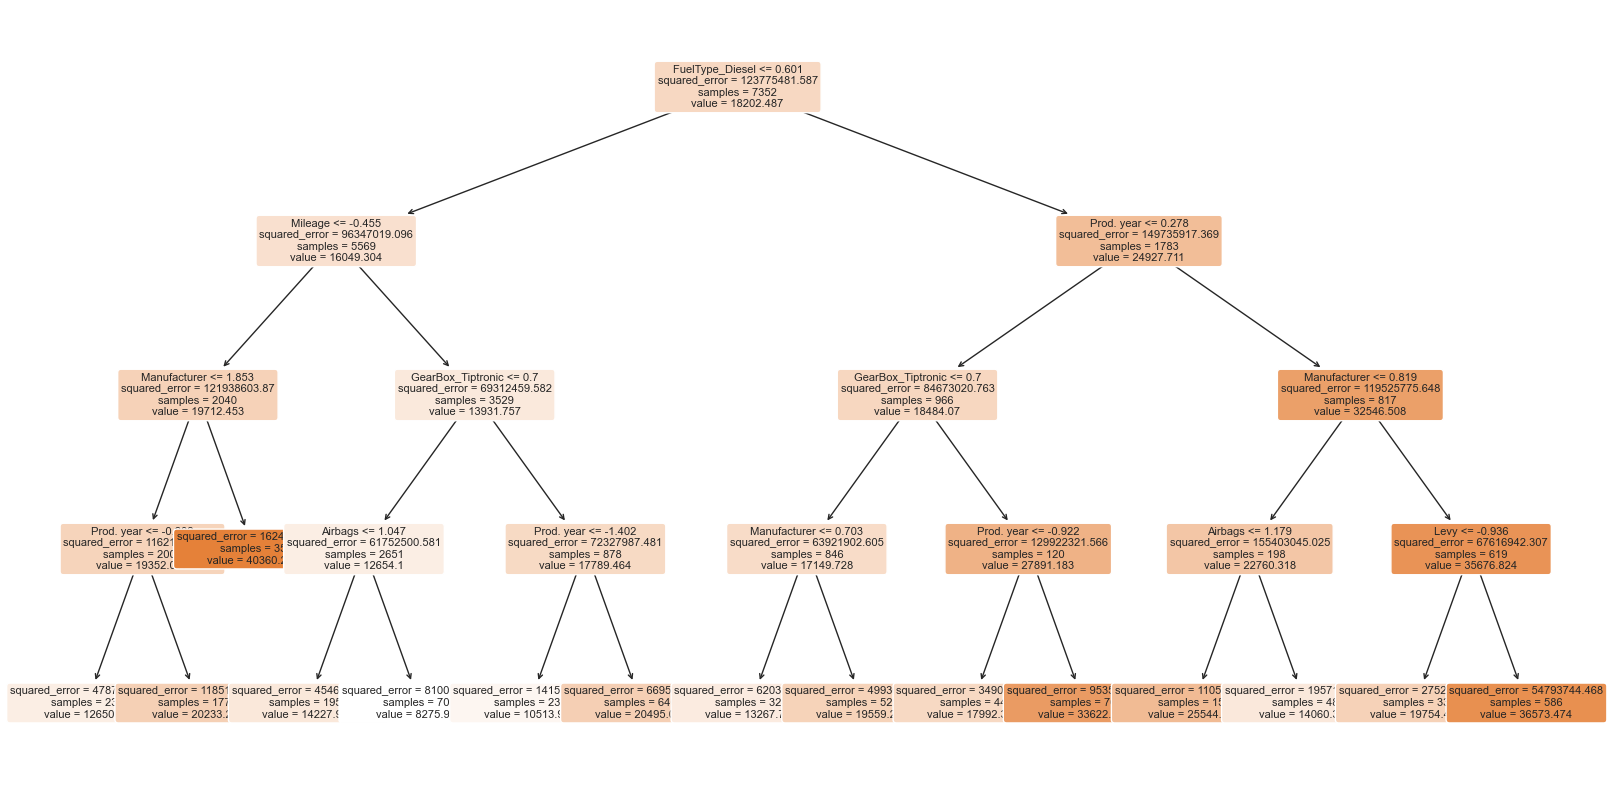

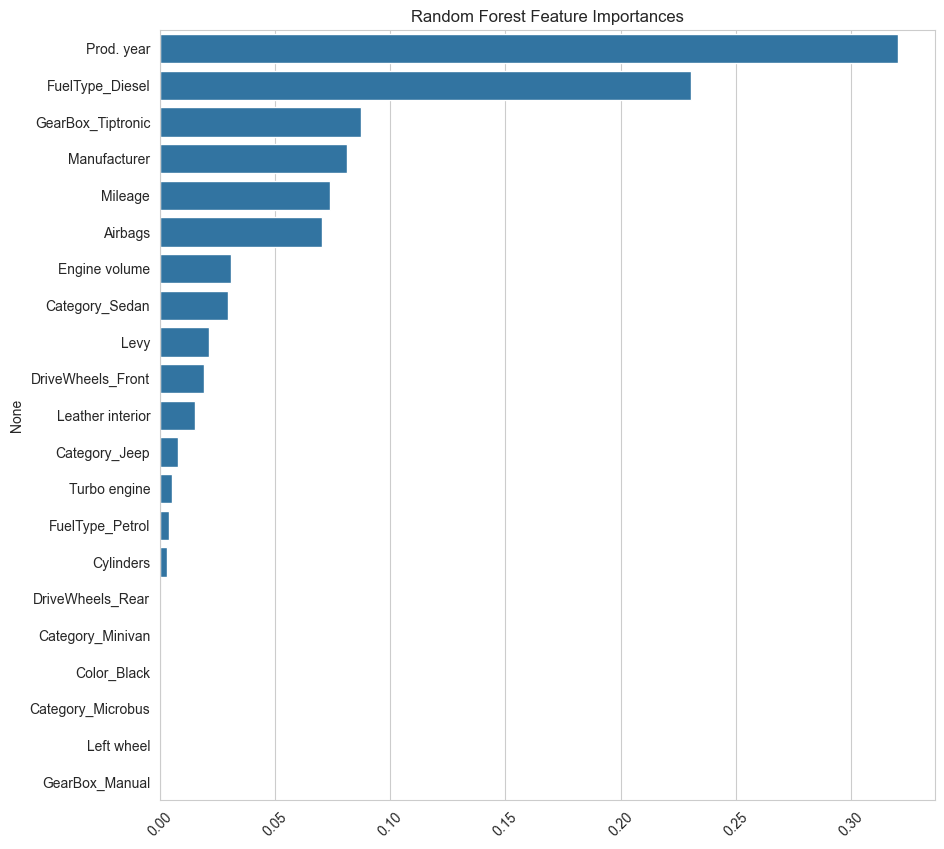

In [753]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree


# Train a Decision Tree
decision_tree = DecisionTreeRegressor(max_depth=4, min_samples_split=50, min_samples_leaf=6)
decision_tree.fit(X_train_normalized, y_train)

# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=50, min_samples_leaf=6)
random_forest.fit(X_train_normalized, y_train)

# Train an SVM 
svm_model = SVR(kernel='linear', C=3.0)
svm_model.fit(X_train_normalized, y_train)

# Make predictions TEST
y_pred_tree = decision_tree.predict(X_test_normalized)
y_pred_forest = random_forest.predict(X_test_normalized)
y_pred_svm = svm_model.predict(X_test_normalized)

# Make predictions TRAIN
y_pred_tree_train = decision_tree.predict(X_train_normalized)
y_pred_forest_train = random_forest.predict(X_train_normalized)
y_pred_svm_train = svm_model.predict(X_train_normalized)

# Evaluate models TEST
r2_tree = r2_score(y_test, y_pred_tree)
r2_forest = r2_score(y_test, y_pred_forest)
r2_svm = r2_score(y_test, y_pred_svm)

print(f'TEST: R2 Score - Decision Tree: {r2_tree}')
print(f'TEST: R2 Score - Random Forest: {r2_forest}')
print(f'TEST: R2 Score - SVM: {r2_svm}')

# Evaluate models TRAIN
r2_tree_train = r2_score(y_train, y_pred_tree_train)
r2_forest_train = r2_score(y_train, y_pred_forest_train)
r2_svm_train = r2_score(y_train, y_pred_svm_train)

print(f'TRAIN: R2 Score - Decision Tree: {r2_tree_train}')
print(f'TRAIN: R2 Score - Random Forest: {r2_forest_train}')
print(f'TRAIN: R2 Score - SVM: {r2_svm_train}')

# Visualize a decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(decision_tree, filled=True, feature_names=X_train.columns, rounded=True, fontsize=8)
plt.show()

plt.figure(figsize=(10, 10))
feature_importance = random_forest.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

# Filter out features with zero importance
non_zero_features = feature_importance[sorted_idx] > 0
sorted_idx = sorted_idx[non_zero_features]

sns.barplot(x=feature_importance[sorted_idx], y=X_train.columns[sorted_idx])
plt.title('Random Forest Feature Importances')
plt.xticks(rotation=45)
plt.show()
#dokumentacia - popisat graf (hlbka, hlavny priznak, pocet listov)

In [754]:
# Vyhodnotenie modelov
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Funkcia pre výpočet RMSE
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Funkcia na vyhodnotenie modelu
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Predikcia na trénovacej množine
    y_train_pred = model.predict(X_train)
    
    # Predikcia na testovacej množine
    y_test_pred = model.predict(X_test)
    
    # Výpočet metrík
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = rmse(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = rmse(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Výpis výsledkov
    print(f"Train MSE: {mse_train}, RMSE: {rmse_train}, R2: {r2_train}")
    print(f"Test MSE: {mse_test}, RMSE: {rmse_test}, R2: {r2_test}")

# Evaluácia pre rozhodovací strom
evaluate_model(decision_tree, X_train_normalized, y_train, X_test_normalized, y_test)

# Evaluácia pre náhodný les
evaluate_model(random_forest, X_train_normalized, y_train, X_test_normalized, y_test)

# Evaluácia pre SVM
evaluate_model(svm_model, X_train_normalized, y_train, X_test_normalized, y_test)


Train MSE: 71726175.37836863, RMSE: 8469.130733337905, R2: 0.4205138654402134
Test MSE: 78282441.75196199, RMSE: 8847.736532693658, R2: 0.41048373579538
Train MSE: 54745363.17874069, RMSE: 7399.010959495917, R2: 0.557704300749771
Test MSE: 59732453.146245815, RMSE: 7728.677321912581, R2: 0.5501768743733676
Train MSE: 79063322.68843804, RMSE: 8891.755883313377, R2: 0.36123599218154634
Test MSE: 85134625.3031845, RMSE: 9226.842650830484, R2: 0.35888246278501434


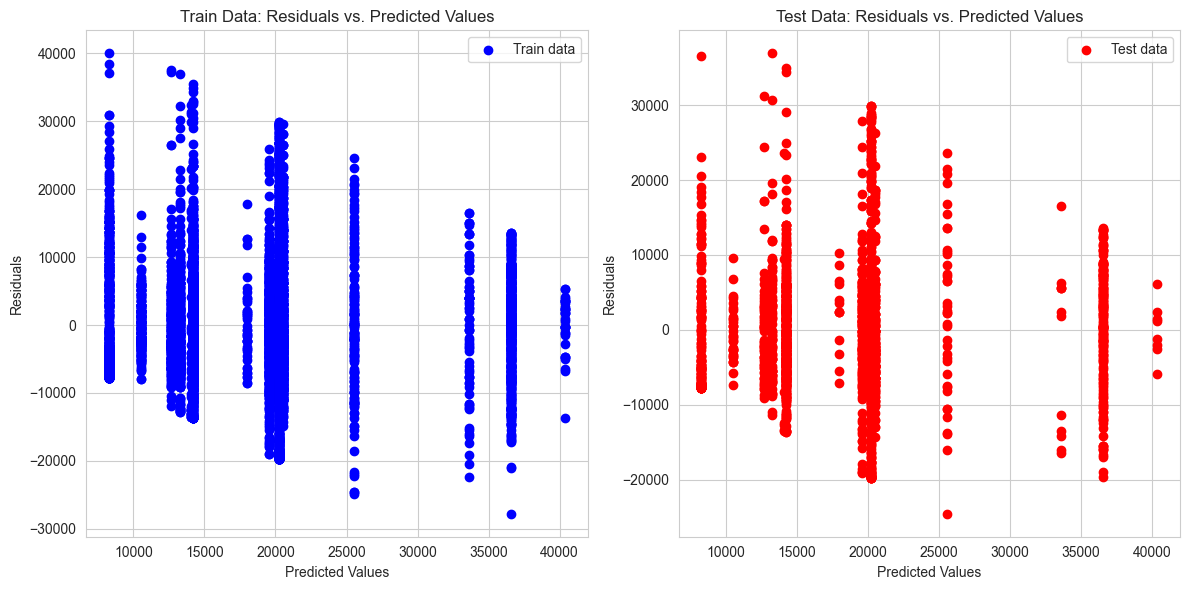

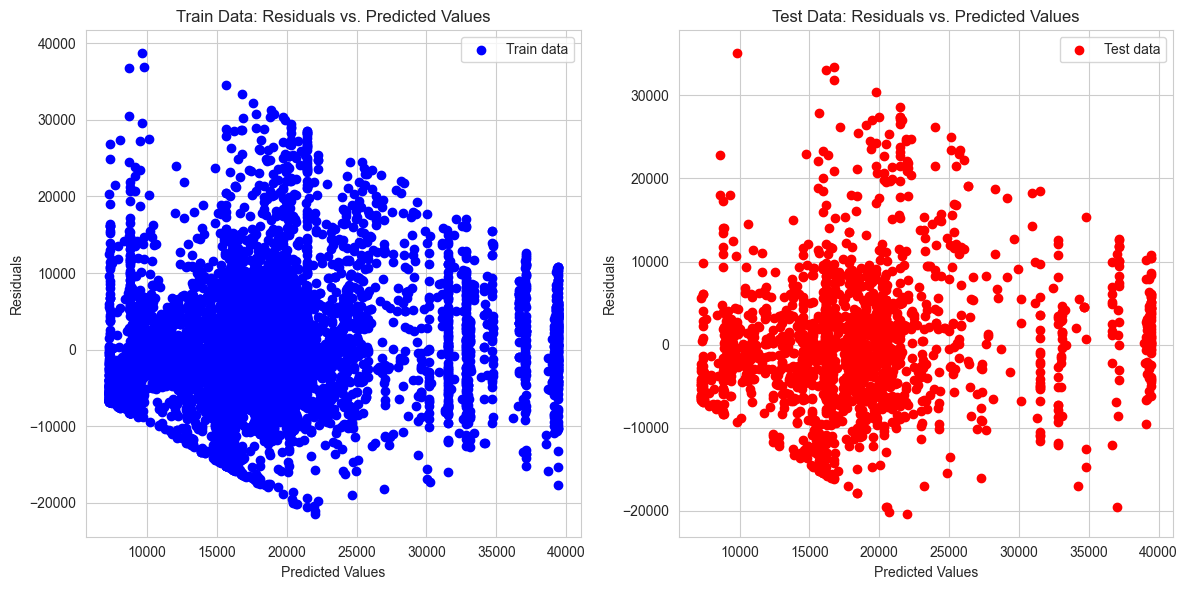

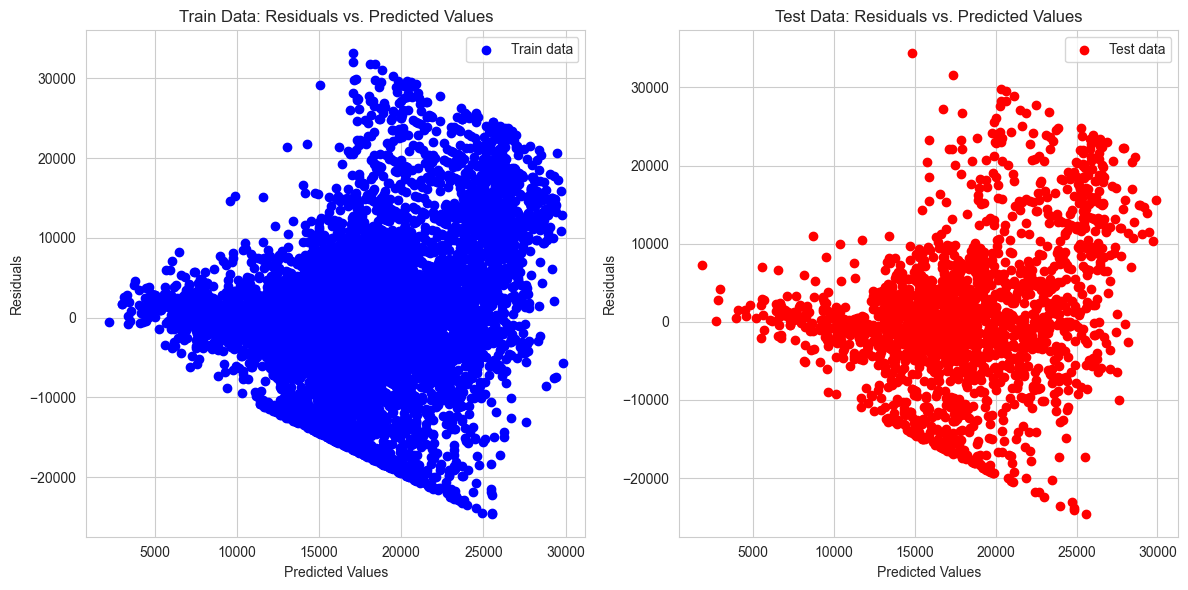

In [755]:
# Vizualizácia reziduálov
# Funkcia na vizualizáciu reziduálov
def plot_residuals(model, X_train, y_train, X_test, y_test):
    # Predikcie
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Výpočet reziduálov
    residuals_train = y_train - y_train_pred
    residuals_test = y_test - y_test_pred
    
    # Vizualizácia reziduálov
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train_pred, residuals_train, c='blue', marker='o', label='Train data')
    plt.title('Train Data: Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(y_test_pred, residuals_test, c='red', marker='o', label='Test data')
    plt.title('Test Data: Residuals vs. Predicted Values')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Vizualizácia reziduálov pre rozhodovací strom
plot_residuals(decision_tree, X_train_normalized, y_train, X_test_normalized, y_test)

# Vizualizácia reziduálov pre náhodný les
plot_residuals(random_forest, X_train_normalized, y_train, X_test_normalized, y_test)

# Vizualizácia reziduálov pre SVM
plot_residuals(svm_model, X_train_normalized, y_train, X_test_normalized, y_test)

# doku - ci tam je trend, preco su tam zvisle pasiky(lebo ked robim graf stromu tak je tam 16 listov a to su tie pasiky), a najvacsia chyba, v akom rozsahu hodnot je najviac predikcii

In [756]:
# druha strana:

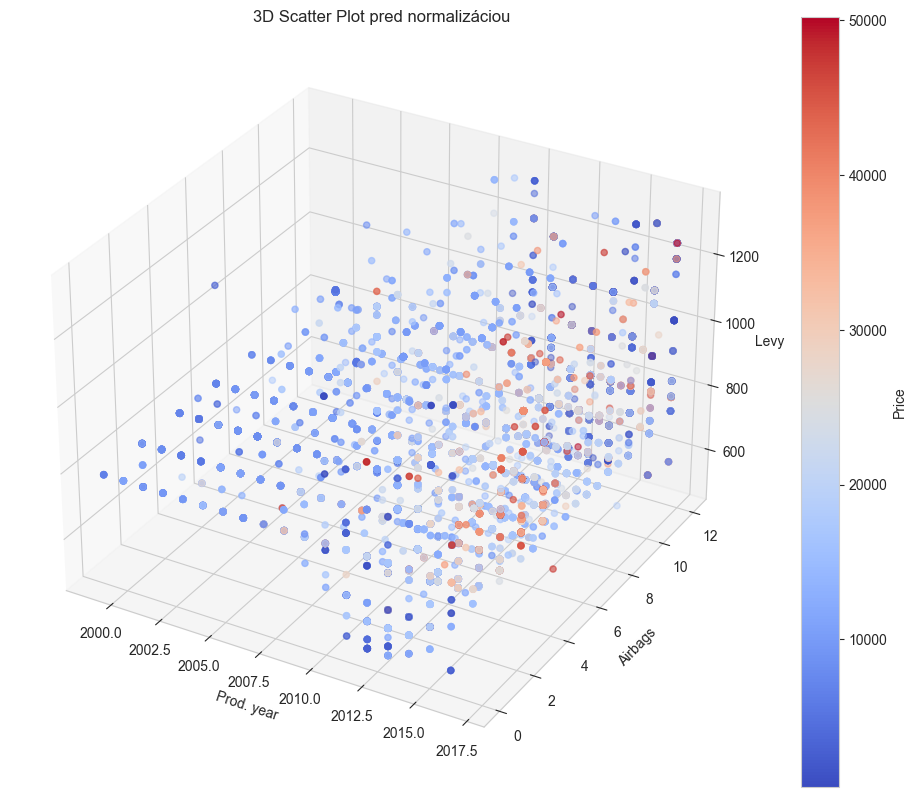

In [757]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vyberte si tri príznaky pred normalizáciou
selected_features = ['Prod. year', 'Airbags', 'Levy']

# Scatter plot pred normalizáciou
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df[selected_features[0]], df[selected_features[1]], df[selected_features[2]], c=df['Price'], cmap='coolwarm')

# Nastavenie osí a titulu
ax.set_xlabel(selected_features[0])
ax.set_ylabel(selected_features[1])
ax.set_zlabel(selected_features[2])
plt.title('3D Scatter Plot pred normalizáciou')

# Pridanie Colorbaru
cbar = plt.colorbar(scatter)
cbar.set_label('Price')

# Zobrazenie grafu
plt.show()



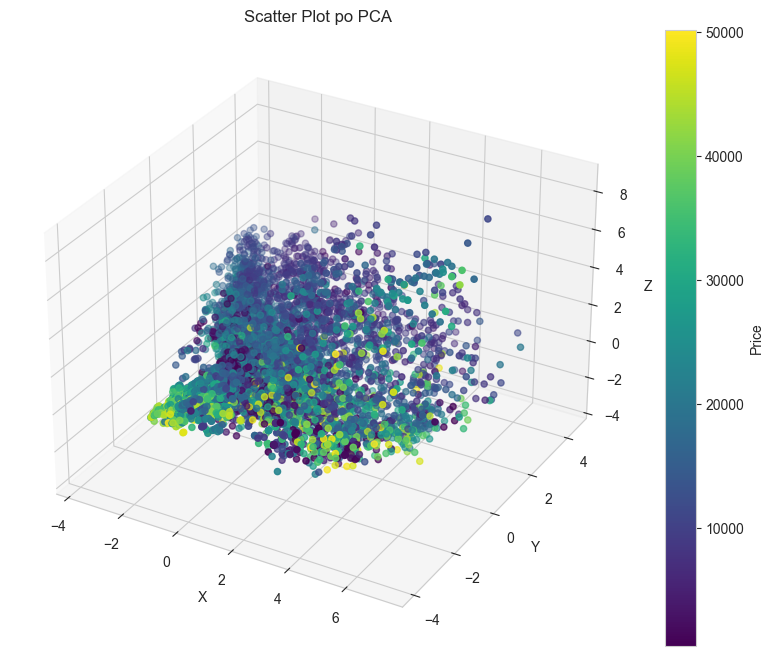

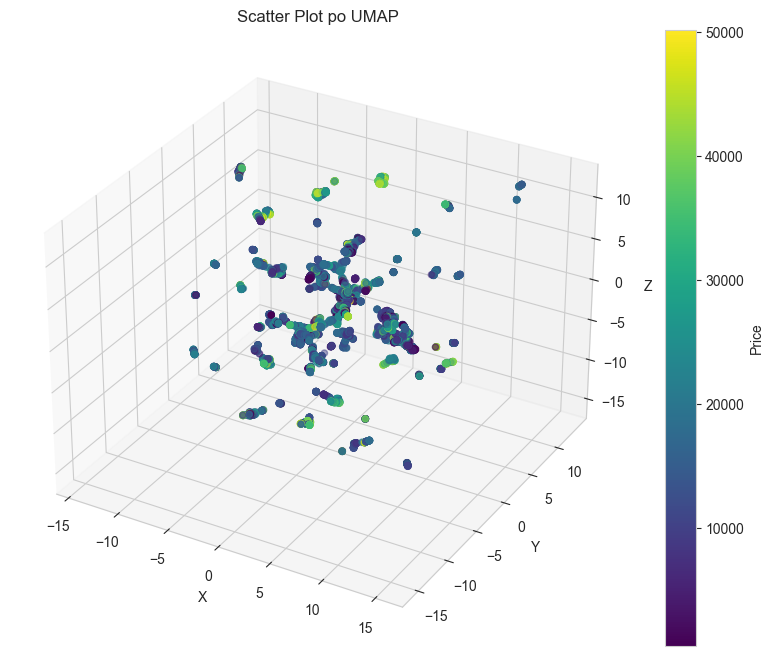

In [758]:
from sklearn.decomposition import PCA
import umap.umap_ as umap

# PCA pre redukciu dimenzie na 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train_normalized)

# Scatter plot po PCA
plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
scatter = ax.scatter3D(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_train, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title('Scatter Plot po PCA')
# Pridanie Colorbaru
cbar = plt.colorbar(scatter)
cbar.set_label('Price')
plt.show()

# UMAP pre redukciu dimenzie na 3D
umap_model = umap.UMAP(n_components=3)
X_umap = umap_model.fit_transform(X_train_normalized)

# Scatter plot po UMAP
plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")
scatter = ax.scatter3D(X_umap[:, 0], X_umap[:, 1], X_umap[:, 2], c=y_train, cmap='viridis')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title('Scatter Plot po UMAP')
# Pridanie Colorbaru
cbar = plt.colorbar(scatter)
cbar.set_label('Price')
plt.show()


Výsledky pre trénovaciu množinu:
MSE: 71766299.2414761
RMSE: 8471.49923221835
R^2 Score: 0.420189698952692

Výsledky pre testovaciu množinu:
MSE: 77771473.18321814
RMSE: 8818.813592724258
R^2 Score: 0.4143316520717564


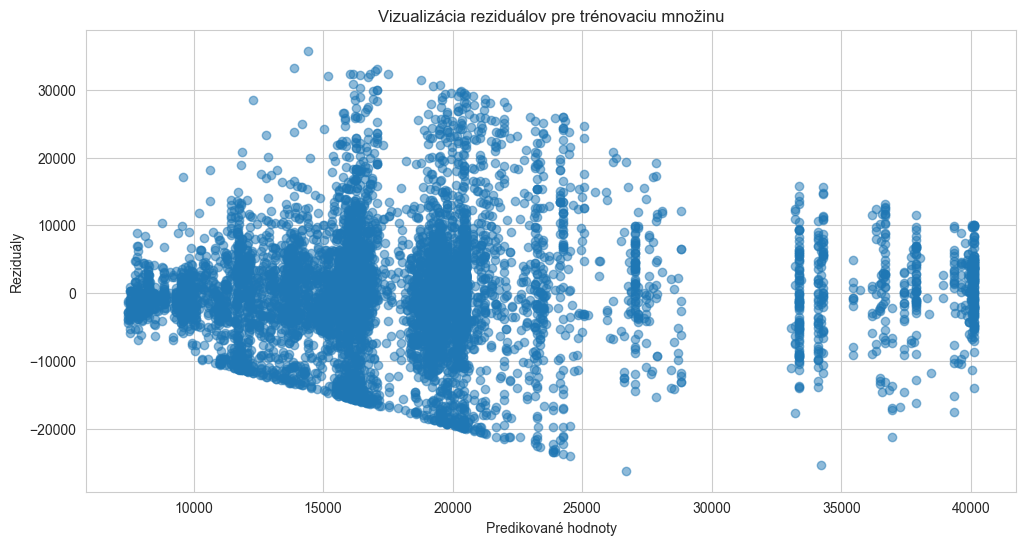

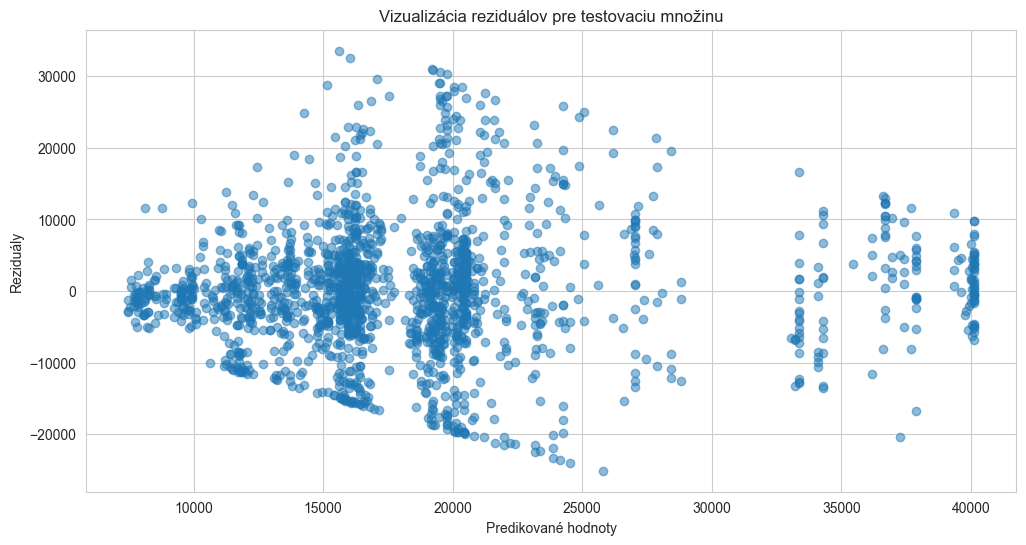

In [759]:
# Korelačná matica
import pandas as pd
# Korelačná matica
correlation_matrix = df.corr()

n_selected_features = 5

# bez price!
# Výber príznakov s najväčšou koreláciou (buď pozitívnou alebo negatívnou)
selected_features_corr = correlation_matrix['Price'].abs().sort_values(ascending=False).index[0:n_selected_features+1]


# Dataframe s vybranými príznakmi
df_selected_corr = df[selected_features_corr]

# uz je df bez stlpca Price
selected_features_corr = selected_features_corr[1:n_selected_features+1]

# Dataframe s vybranými príznakmi
x_selected_corr = pd.DataFrame(data = X_train_normalized,  
                  index = X_train_normalized[:,0],  
                  columns = X_train.columns)

x_selected_corr = x_selected_corr[selected_features_corr]

# Dataframe s vybranými príznakmi
x_selected_corr_test = pd.DataFrame(data = X_test_normalized,  
                  index = X_test_normalized[:,0],  
                  columns = X_test.columns)

x_selected_corr_test = x_selected_corr_test[selected_features_corr]

# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=50, min_samples_leaf=6)
random_forest.fit(x_selected_corr, y_train)

# Predikcia na trénovacej množine
y_pred_train = random_forest.predict(x_selected_corr)

# Predikcia na testovacej množine
y_pred_test = random_forest.predict(x_selected_corr_test)

# Výpočet metrík pre trénovaciu množinu
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Výpočet metrík pre testovaciu množinu
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Výpis výsledkov
print('Výsledky pre trénovaciu množinu:')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R^2 Score: {r2_train}')

print('\nVýsledky pre testovaciu množinu:')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R^2 Score: {r2_test}')

# Výpočet reziduálov pre trénovaciu a testovaciu množinu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Vizualizácia reziduálov pre trénovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.title('Vizualizácia reziduálov pre trénovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()

# Vizualizácia reziduálov pre testovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.title('Vizualizácia reziduálov pre testovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()

Výsledky pre trénovaciu množinu:
MSE: 76987761.33575283
RMSE: 8774.266997063221
R^2 Score: 0.3780047522466754

Výsledky pre testovaciu množinu:
MSE: 85487155.35352542
RMSE: 9245.926419430636
R^2 Score: 0.35622768869205323


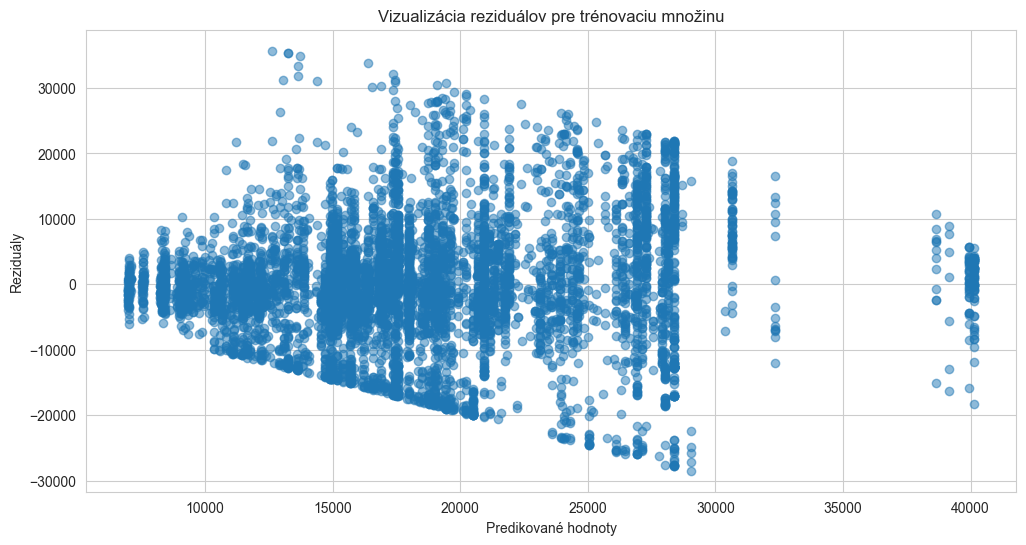

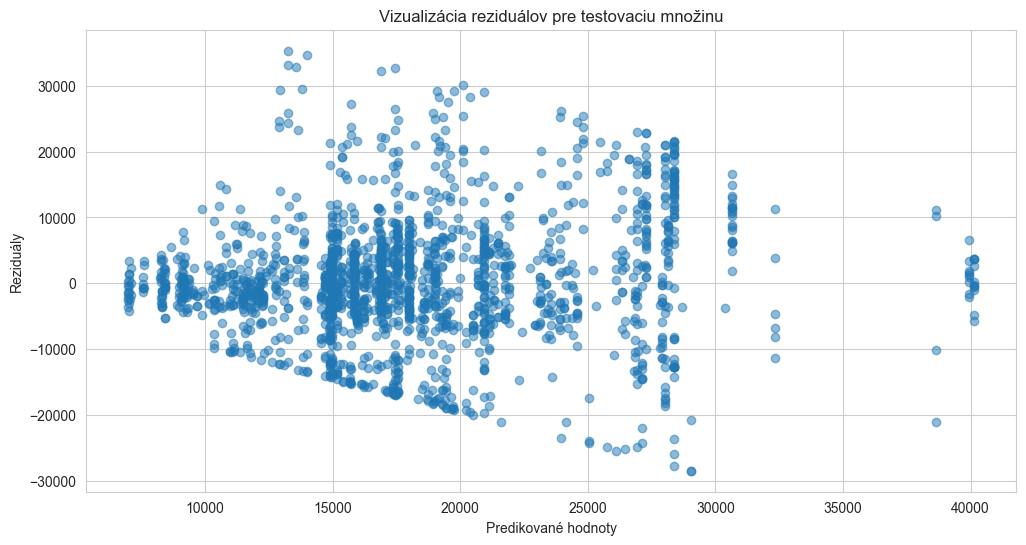

In [760]:
# Výber príznakov podľa ich dôležitosti v Random Forest
selected_features_importance = X_train.columns[random_forest.feature_importances_.argsort()[::-1][0:6]]

# Dataframe s vybranými príznakmi
df_selected_importance = df[selected_features_importance]
y = df['Price']

# Rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(df_selected_importance, y, test_size=0.2, random_state=42)

# Normalizácia
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=50, min_samples_leaf=6)
random_forest.fit(X_train_normalized, y_train)

# Predikcia na trénovacej množine
y_pred_train = random_forest.predict(X_train_normalized)

# Predikcia na testovacej množine
y_pred_test = random_forest.predict(X_test_normalized)

# Výpočet metrík pre trénovaciu množinu
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Výpočet metrík pre testovaciu množinu
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Výpis výsledkov
print('Výsledky pre trénovaciu množinu:')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R^2 Score: {r2_train}')

print('\nVýsledky pre testovaciu množinu:')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R^2 Score: {r2_test}')

# Výpočet reziduálov pre trénovaciu a testovaciu množinu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Vizualizácia reziduálov pre trénovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.title('Vizualizácia reziduálov pre trénovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()

# Vizualizácia reziduálov pre testovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.title('Vizualizácia reziduálov pre testovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()


Výsledky pre trénovaciu množinu:
MSE: 76574637.47219898
RMSE: 8750.69354235417
R^2 Score: 0.3813424396323801

Výsledky pre testovaciu množinu:
MSE: 83594038.68786602
RMSE: 9142.977561378242
R^2 Score: 0.3704840537142272


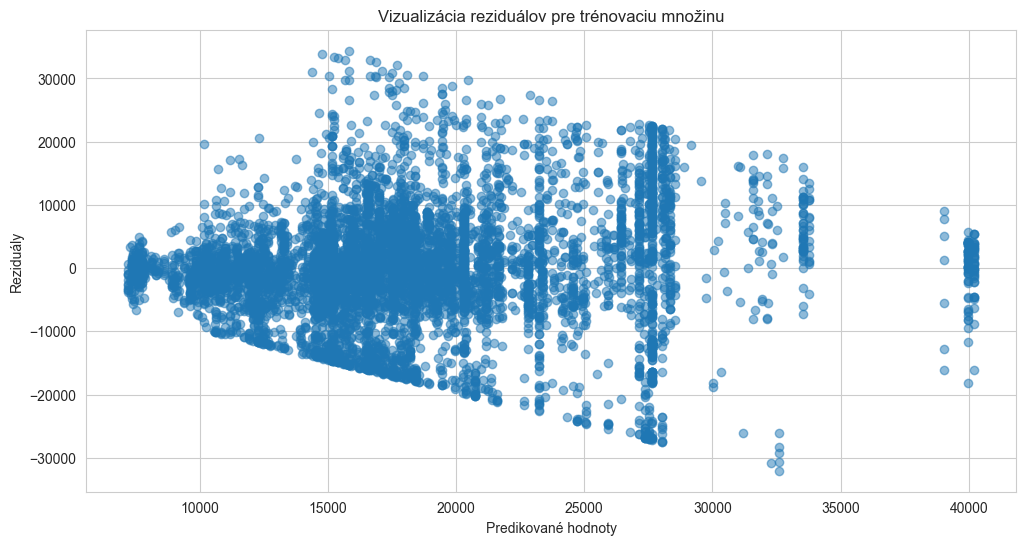

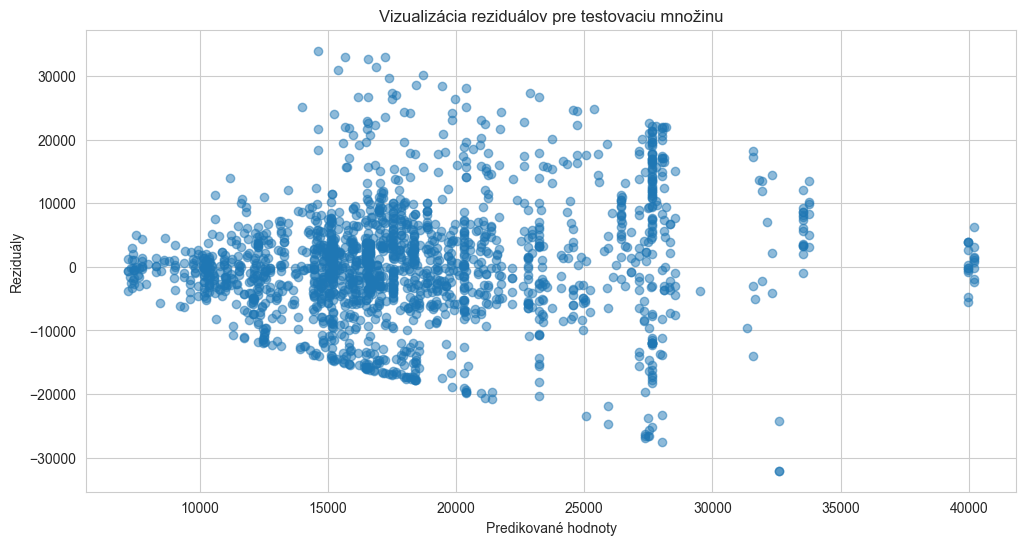

In [761]:
# PCA pre redukciu dimenzie na dosiahnutie zvolenej variancie
target_variance = 0.95
pca = PCA(n_components=target_variance)
pca.fit(X_train_normalized)

# Transform both training and testing data
X_train_pca = pca.transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# Vybrané príznaky z PCA
selected_features_pca = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]

# Dataframe s vybranými príznakmi
df_selected_pca_train = pd.DataFrame(X_train_pca, columns=selected_features_pca)
df_selected_pca_test = pd.DataFrame(X_test_pca, columns=selected_features_pca)

# Train a Random Forest (ensemble of trees)
random_forest = RandomForestRegressor(n_estimators=50, max_depth=5, min_samples_split=50, min_samples_leaf=6)
random_forest.fit(df_selected_pca_train, y_train)

# Predikcia na trénovacej množine
y_pred_train = random_forest.predict(df_selected_pca_train)

# Predikcia na testovacej množine
y_pred_test = random_forest.predict(df_selected_pca_test)

# Výpočet metrík pre trénovaciu množinu
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)

# Výpočet metrík pre testovaciu množinu
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

# Výpis výsledkov
print('Výsledky pre trénovaciu množinu:')
print(f'MSE: {mse_train}')
print(f'RMSE: {rmse_train}')
print(f'R^2 Score: {r2_train}')

print('\nVýsledky pre testovaciu množinu:')
print(f'MSE: {mse_test}')
print(f'RMSE: {rmse_test}')
print(f'R^2 Score: {r2_test}')

# Výpočet reziduálov pre trénovaciu a testovaciu množinu
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Vizualizácia reziduálov pre trénovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.title('Vizualizácia reziduálov pre trénovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()

# Vizualizácia reziduálov pre testovaciu množinu
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.title('Vizualizácia reziduálov pre testovaciu množinu')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Reziduály')
plt.show()


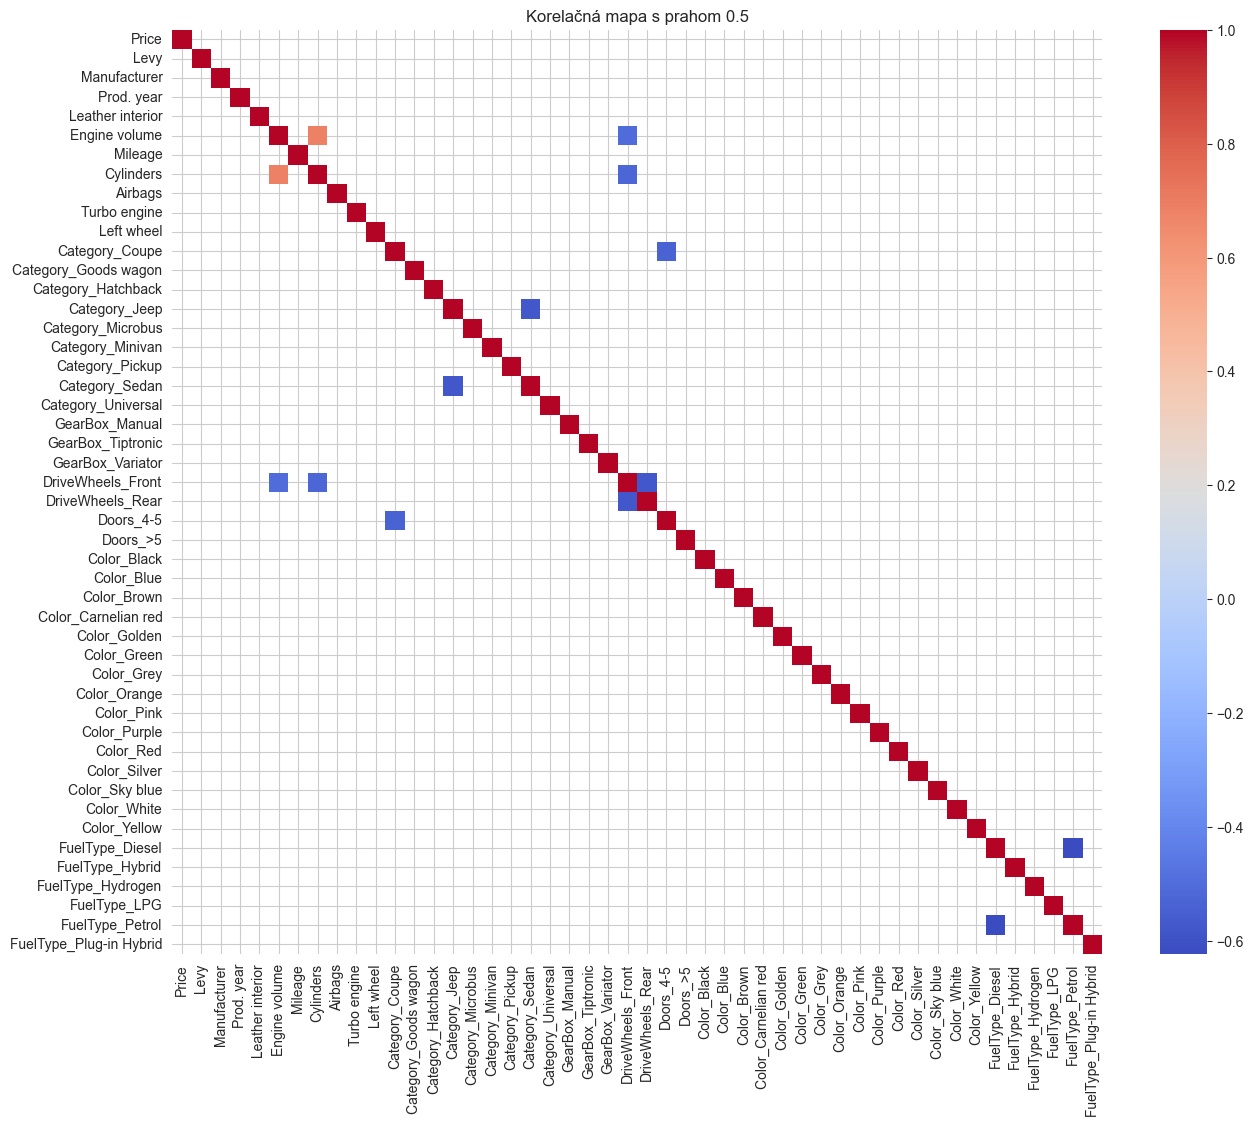

In [762]:
# BONUS

# Vytvorenie korelačnej matice
correlation_matrix = df.corr()

# Vyfiltrovanie korelácií nad prahom 0.5 (príklad)
threshold = 0.5
high_correlation = correlation_matrix[abs(correlation_matrix) > threshold]

plt.figure(figsize=(15, 12))
sns.heatmap(high_correlation, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Korelačná mapa s prahom 0.5')
plt.show()

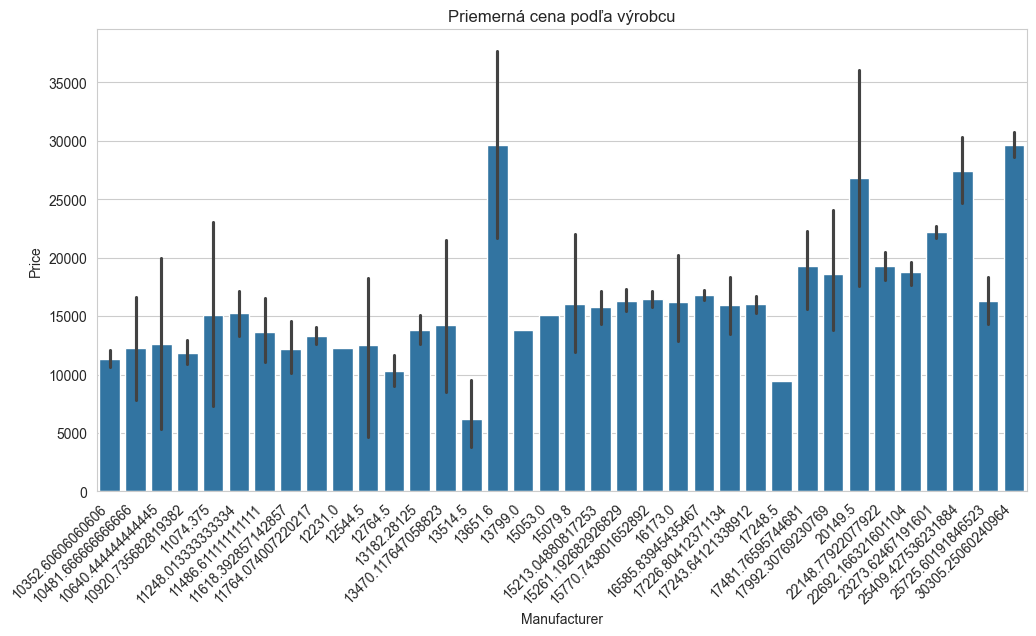

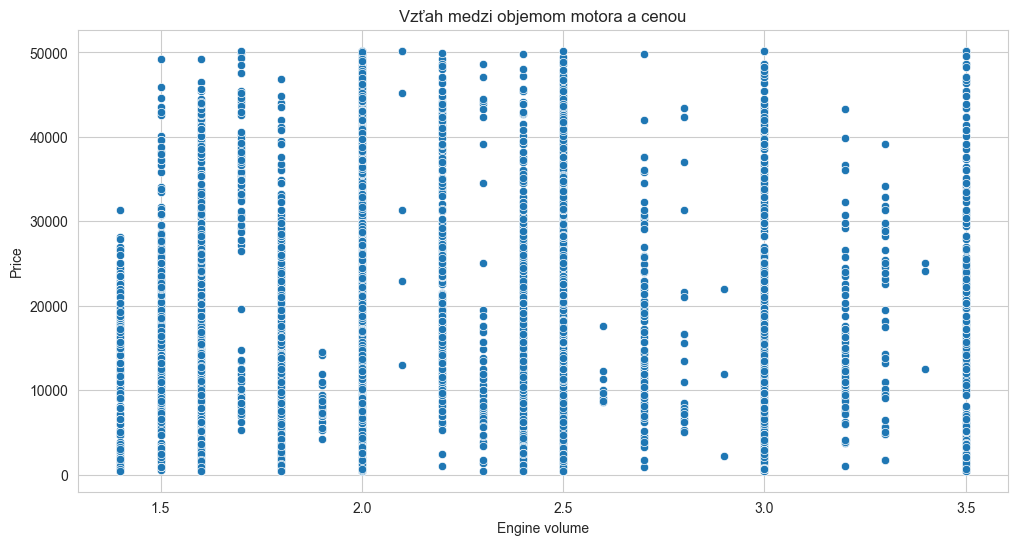

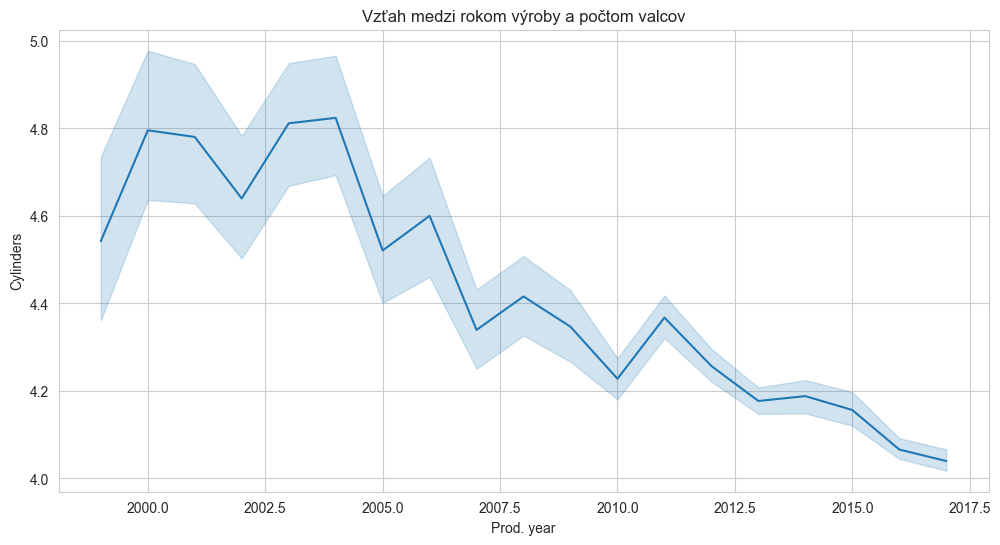

In [763]:
# Hypotéza 1: Ceny automobilov sú ovplyvnené ich výrobcom
plt.figure(figsize=(12, 6))
sns.barplot(x='Manufacturer', y='Price', data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Priemerná cena podľa výrobcu')
plt.show()

# Hypotéza 2: Vyššia cena automobilu s väčším objemom motora
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Engine volume', y='Price', data=df)
plt.title('Vzťah medzi objemom motora a cenou')
plt.show()

# Hypotéza 6: Rok výroby ovplyvňuje počet valcov
plt.figure(figsize=(12, 6))
sns.lineplot(x='Prod. year', y='Cylinders', data=df)
plt.title('Vzťah medzi rokom výroby a počtom valcov')
plt.show()

# treba najst 2 vztahy, nie iba grafy, zase mat nejaku hypotezu a dohladat to !!!!!!!!!!

C:\Users\boetf\Desktop\Vyska - skripta\ING\4.rocnik\zimny semester\SUNS\SUNS-zadanie-2\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


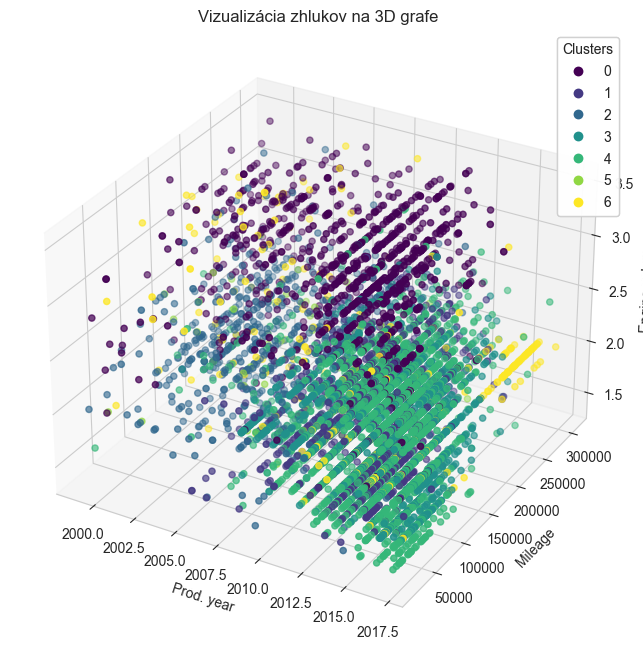

In [768]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Zhlukovanie pomocou k-means s 3 zhlukmi
kmeans = KMeans(n_clusters=7, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(X_train_normalized)

# Vizualizácia na 3D grafe
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Príznaky pre vizualizáciu (vyber si podľa potreby)
feature1 = 'Prod. year'
feature2 = 'Mileage'
feature3 = 'Engine volume'

# Scatter plot s farebnými zhlukmi
scatter = ax.scatter(train_data[feature1], train_data[feature2], train_data[feature3], c=train_data['Cluster'], cmap='viridis')

# Nastavenie osí a titulu
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title('Vizualizácia zhlukov na 3D grafe')

# Farebná legenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Zobrazenie grafu
plt.show()


In [765]:
# druha poduloha
# - nesmiem dat do trenovania id clustra a ani price!

from sklearn.linear_model import LinearRegression

# Inicializujeme zoznamy pre modely a výsledky
models = []
mse_values = []
r2_values = []

# Iterujeme cez jednotlivé zhluky
for cluster_label in range(7):  # Tvoje zhluky môžu mať iný počet, uprav podľa potreby
    # Vyberieme dáta patriace do daného zhluku
    cluster_data = train_data[train_data['Cluster'] == cluster_label]
    
    # Rozdelíme dáta na vstupné a výstupné množiny
    X_cluster = cluster_data.drop(columns=['Price', 'Cluster'])
    y_cluster = cluster_data['Price']
    
    # Natrénujeme model
    model = LinearRegression()
    model.fit(X_cluster, y_cluster)
    
    # Pridáme model do zoznamu modelov
    models.append(model)
    
    # Predikcia na trénovacej množine
    y_pred_cluster = model.predict(X_cluster)
    
    # Výpočet metrík
    mse_cluster = mean_squared_error(y_cluster, y_pred_cluster)
    r2_cluster = r2_score(y_cluster, y_pred_cluster)
    
    # Pridáme hodnoty metrík do zoznamu
    mse_values.append(mse_cluster)
    r2_values.append(r2_cluster)

    # Výpis výsledkov pre každý zhluk
    print(f'Zhluk {cluster_label} - MSE: {mse_cluster}, R^2 Score: {r2_cluster}')

# Výpis výsledkov pre pôvodný model
# print('\nPôvodný model - MSE:', mse)
# print('Pôvodný model - R^2 Score:', r2)


Zhluk 0 - MSE: 56333715.20884337, R^2 Score: 0.1734829396540487
Zhluk 1 - MSE: 67979886.30765948, R^2 Score: 0.08648510855002367
Zhluk 2 - MSE: 8423124.723973135, R^2 Score: 0.28703598648782747
Zhluk 3 - MSE: 57603146.2205514, R^2 Score: 0.38629078565114094
Zhluk 4 - MSE: 135755844.9957276, R^2 Score: 0.06534153347902516
Zhluk 5 - MSE: 106148686.046884, R^2 Score: 0.047103449684700704
Zhluk 6 - MSE: 46601389.31764694, R^2 Score: 0.05093081181586667


Epoch 1/100
184/184 [==============================] - 1s 4ms/step - loss: 458139360.0000 - mae: 18269.8066 - val_loss: 438961920.0000 - val_mae: 17839.8789
Epoch 2/100
184/184 [==============================] - 1s 3ms/step - loss: 454252416.0000 - mae: 18184.4883 - val_loss: 432646784.0000 - val_mae: 17697.8984
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 444561504.0000 - mae: 17973.4238 - val_loss: 420269568.0000 - val_mae: 17420.4102
Epoch 4/100
184/184 [==============================] - 1s 3ms/step - loss: 428750528.0000 - mae: 17629.2227 - val_loss: 402467040.0000 - val_mae: 17022.4805
Epoch 5/100
184/184 [==============================] - 1s 3ms/step - loss: 408053280.0000 - mae: 17179.4219 - val_loss: 380849920.0000 - val_mae: 16535.5098
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 383888544.0000 - mae: 16642.7188 - val_loss: 356559872.0000 - val_mae: 15981.5361
Epoch 7/100
184/184 [==============================] - 1s 

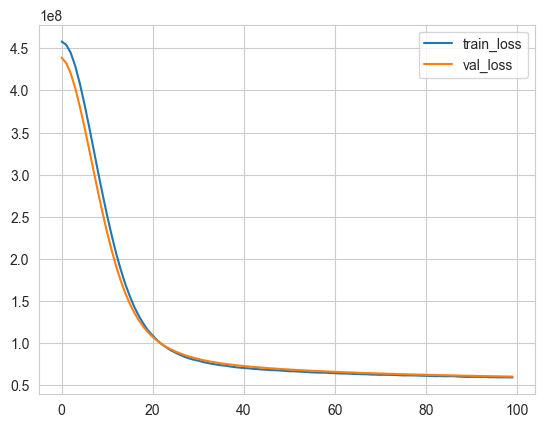

In [766]:
# natrenovanie cez keras(aktivacna funkcia vo vystupnej vrstve - sigmoid, meni sa pocet neuronoc - iba 1, meni sa chybova funkcia(--> mean_squared_error/mean_absolute_error), zase vyhodnit r2 skore, reziduali, nesmie tam ostat argmax!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Rozdelenie dát na trénovaciu a testovaciu množinu
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Vytvorenie vstupných a výstupných množín
X_train = train_data.drop(columns=['Price'])
y_train = train_data['Price']

X_test = test_data.drop(columns=['Price'])
y_test = test_data['Price']

# Normalizácia
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Vytvorenie modelu
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=X_train_normalized.shape[1]))
model.add(Dropout(0.1)) 
model.add(Dense(units=1, activation='linear'))  

# Kompilácia modelu
optimizer = Adam(lr=0.0002)  # Nastavil som nižší learning rate
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Trénovanie modelu
history = model.fit(X_train_normalized, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predikcia na testovacej množine
y_pred = model.predict(X_test_normalized).flatten()

# Výpočet metrík
mse = mean_squared_error(y_test, y_pred)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

# Výpis výsledkov
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R^2 Score: {r2}')


# Krok 11: Zobrazenie kriviek straty a presnosti
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
